# **AIM**

The aim of this notebook is to develop and evaluate a predictive model using machine learning techniques to identify the presence of heart disease in patients based on various physiological and clinical features. This notebook seeks to determine the relative importance of these features in heart disease prediction and to explore the performance of a KNN model and Random Forest Model in classifying heart diseases in patients accurately.

# **ABSTRACT**

This notebook focuses on the application of machine learning to predict heart disease using a dataset of cardiovascular measurements from 303 patients. Key features include age, sex, types of chest pain, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiographic results, and others. The data was cleaned, analyzed for distribution and correlation, and utilized to train a KNN model. The model achieved a validation accuracy above 90% using the KNN Model, indicating effective learning and generalization capabilities.

# **VARIABLE DESCRIPTION**

- age:	Age of the patient in years
- sex:	Gender of the patient (0 = male, 1 = female)
- cp	Chest pain type:
  0: Typical angina
  1: Atypical angina
  2: Non-anginal pain
  3: Asymptomatic
- trestbps:	Resting blood pressure in mm Hg
- chol:	Serum cholesterol in mg/dl
- fbs:	Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)
- restecg:	Resting electrocardiographic results:
  0: Normal
  1: Having ST-T wave abnormality
  2: Showing probable or definite left ventricular hypertrophy
- thalach:	Maximum heart rate achieved during a stress test
- exang:	Exercise-induced angina (1 = yes, 0 = no)
- oldpeak:	ST depression induced by exercise relative to rest
- slope:	Slope of the peak exercise ST segment:
  0: Upsloping
  1: Flat
  2: Downsloping
- ca:	Number of major vessels (0-4) colored by fluoroscopy
- thal:	Thalium stress test result:
  0: Normal
  1: Fixed defect
  2: Reversible defect
  3: Not described
- target:	Heart disease status (0 = no disease, 1 = presence of disease)

# **IMPORTING THE REQUIRED LIBRARIES**

In [218]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# **LOADING THE DATASET FROM GITHUB**

In [219]:
# Load and prepare the data
def load_data():
    # URL for the Kaggle heart disease dataset with the appropriate column names
    url = "https://raw.githubusercontent.com/vaishveerkumar/Data-Science/main/CAPSTONE_PROJECT/heart.csv"
    data = pd.read_csv(url)
    data = data.replace('?', np.nan)  # Replace missing value placeholders
    data.dropna(inplace=True)  # Drop rows with missing values
    data['target'] = (data['target'] > 0).astype(int)

    return data

# Load the data
data = load_data()


# **EXPLORATORY DATA ANALYSIS ON THE HEALTH DATASET**

In [220]:
print(data.head())

# 1. Basic Descriptive Statistics
print(data.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  12


# **INFERENCE FROM THE EXPLORATORY DATA ANALYSIS**

**DataFrame Head Output:**

The preview of the data indicates a variety of continuous cardiovascular health-related measurements across patients. No categorical data is evident here, implying all features are either binary or continuous numerical values.

**Descriptive Statistics (data.describe() output):**

- Age: Patients range from young adults to the elderly, with an average age in the mid-50s. This suggests that the dataset covers a broad spectrum of adult ages, relevant for heart disease analysis.
- Resting Blood Pressure (trestbps): The values span a reasonable range for resting blood pressure, with some patients exhibiting high values which are risk factors for heart disease.
- Cholesterol (chol): Cholesterol levels vary widely, with some patients showing high serum cholesterol, another risk factor for cardiovascular conditions.
- Maximum Heart Rate (thalach): There's a wide range of maximum heart rates, with some patients reaching high levels, which might be indicative of the cardiovascular response to stress or exercise.
- ST Depression (oldpeak): The ST depression induced by exercise shows some variation among the patients, with higher values being a potential indicator of myocardial ischemia.
- Distribution of Target Variable:
The target variable distribution indicates a nearly balanced dataset between patients with heart disease (target=1) and without (target=0). This balance is critical for training unbiased machine learning models.

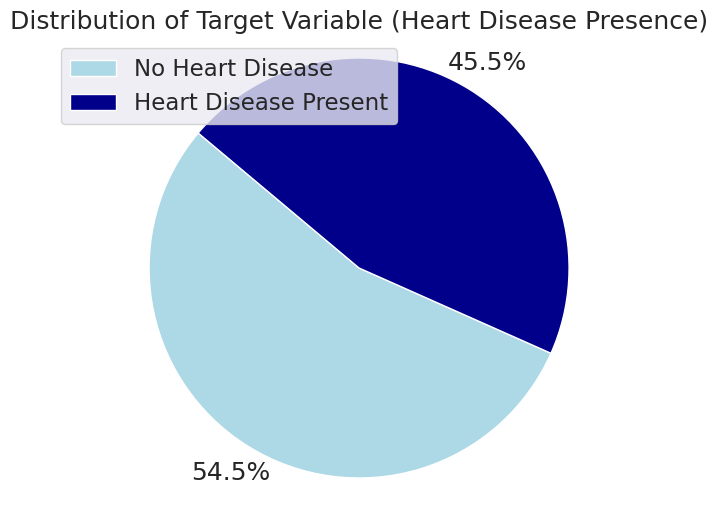

In [249]:
# Define class labels
class_labels = {1: 'Heart Disease Present', 0: 'No Heart Disease'}
target_counts = data['target'].value_counts()
custom_colors = ['#ADD8E6', '#00008B']

# Plot a pie chart with different colors and labels
legend_labels = ['No Heart Disease', 'Heart Disease Present']

# Plot a pie chart with legends and custom colors
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(target_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=custom_colors, pctdistance=1.15)
plt.legend(patches, legend_labels, loc="best")
plt.title('Distribution of Target Variable (Heart Disease Presence)')
plt.axis('equal')
plt.show()


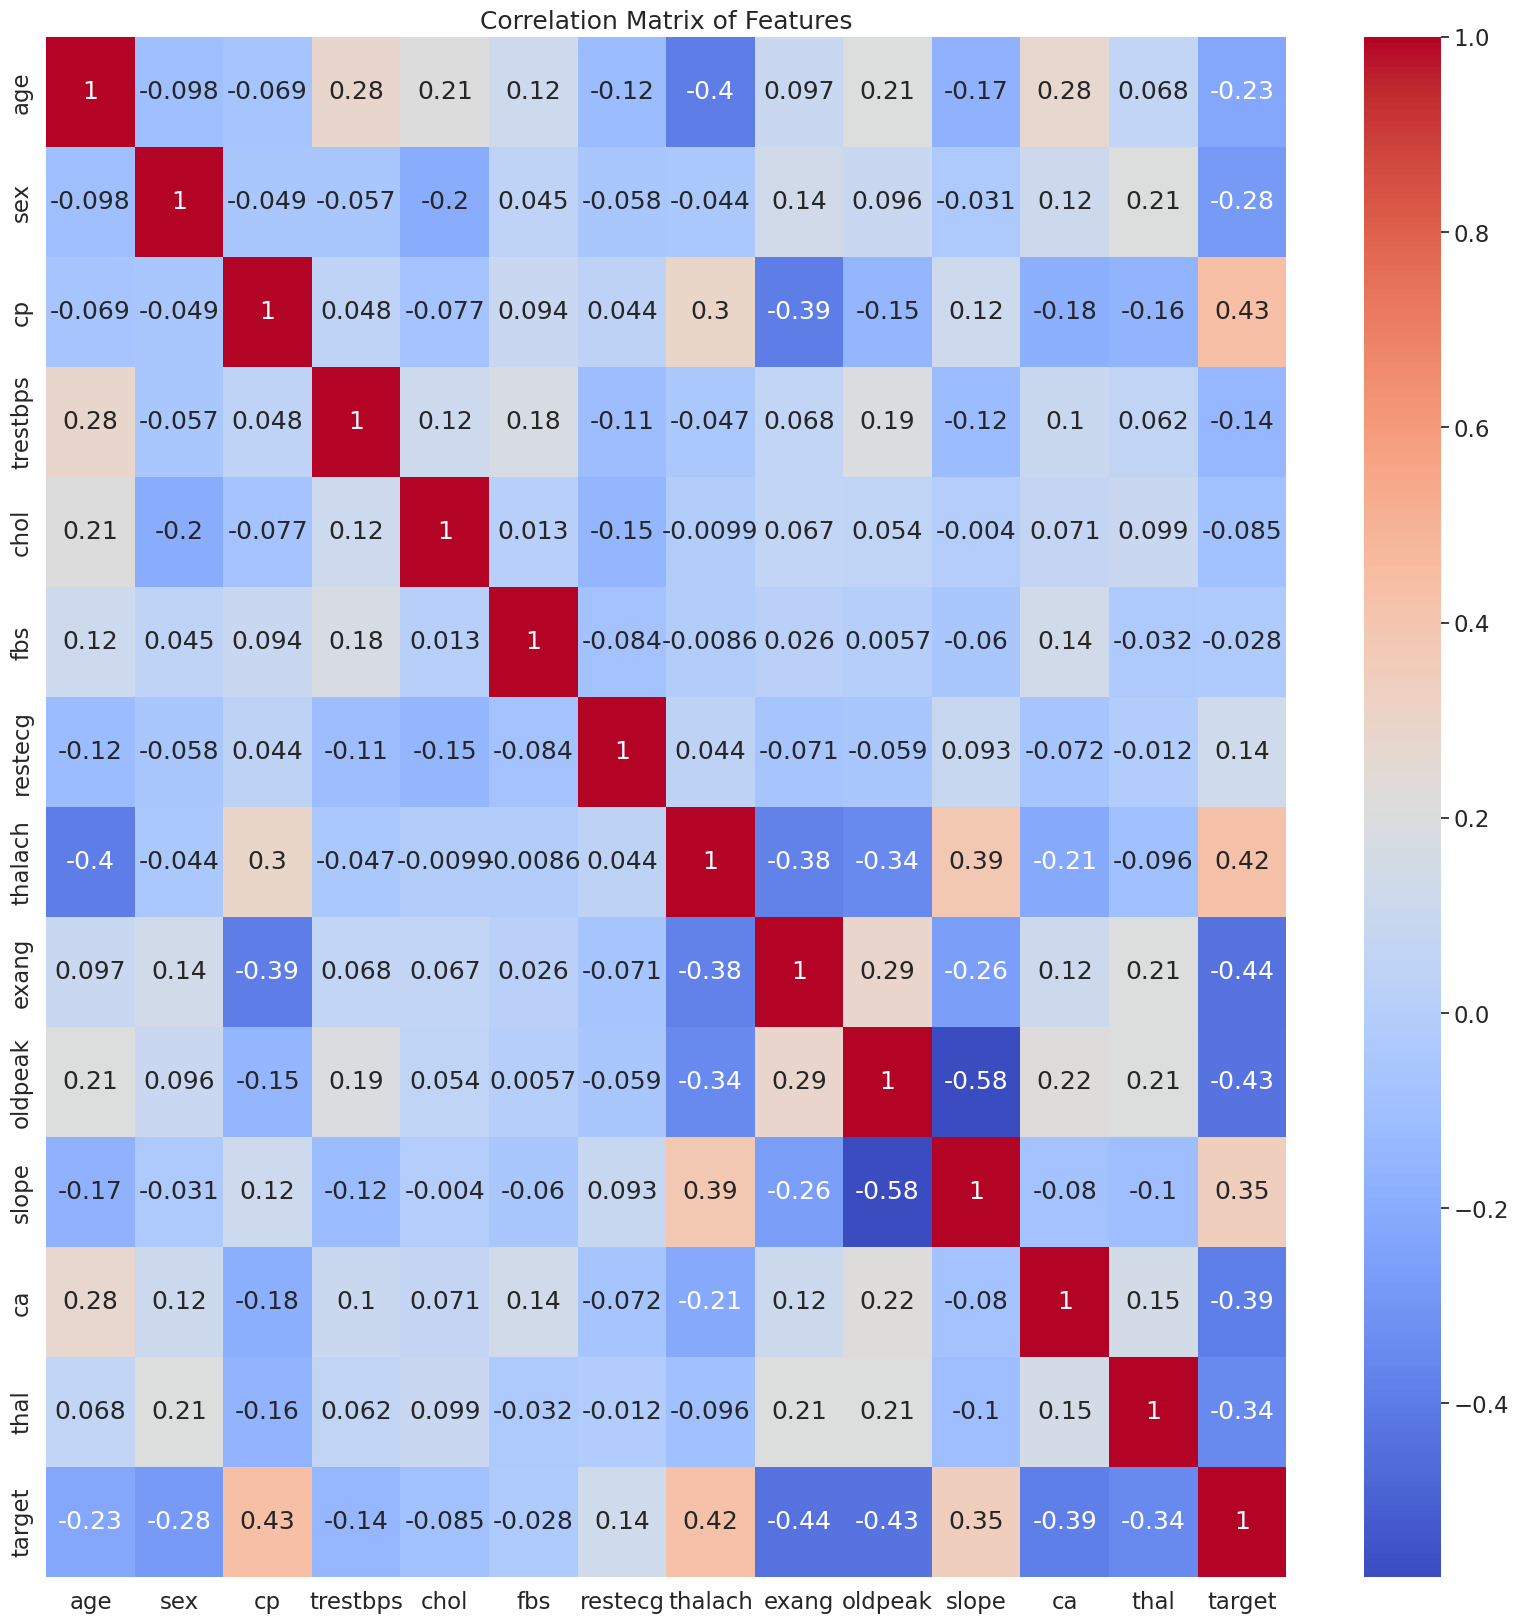

In [222]:
# 3. Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

#**INFERENCE FROM THE DISTRIBUTION PLOT AND CORRELATION MATRIX**

**Distribution of Target Variable:**

- The bar chart for the target variable shows that the dataset includes a considerable number of patients both with and without heart disease, as indicated by the binary target variable where '1' represents the presence of heart disease.
- The class distribution appears balanced, which is advantageous for model training as it helps in creating a classifier that is not biased towards a particular class.

**Correlation Matrix:**

- Age: There is **no strong direct correlation** between age and heart disease presence in this dataset, indicating that while age is a risk factor, it's not a definitive predictor in this sample.
- Sex: It shows some level of correlation with the target, suggesting potential differences in heart disease prevalence between genders.
- Chest Pain (cp): Exhibits a **positive correlation** with the target variable, implying that certain types of chest pain are more associated with heart disease.
- Resting Blood Pressure (trestbps): There is **no significant correlation** observed with the target, which may suggest that within this dataset, resting blood pressure alone isn't a strong indicator of heart disease.
- Serum Cholesterol (chol): This also **doesn’t show a strong correlation** with heart disease presence. High cholesterol is a known risk factor, but in this dataset, it doesn't stand out as a primary predictor.
- Fasting Blood Sugar (fbs): Its correlation with heart disease is **not strong**, indicating that this alone may not be a significant predictor of heart disease in this set of patients.
- Resting Electrocardiographic (restecg): Shows a **weak correlation** with the target. Abnormal ECG readings can indicate heart disease, but the strength of the relationship varies.
- Maximum Heart Rate (thalach): Has a **negative correlation** with the target, suggesting that lower maximum heart rates are more common in patients with heart disease in this dataset.
- Exercise-Induced Angina (exang): Shows a **positive correlation**, indicating that patients who experience angina with exercise are more likely to have heart disease.
- ST Depression (oldpeak): Displays a **positive correlation** with the presence of heart disease. ST depression can indicate ischemia, so this makes clinical sense and could be a significant predictor.

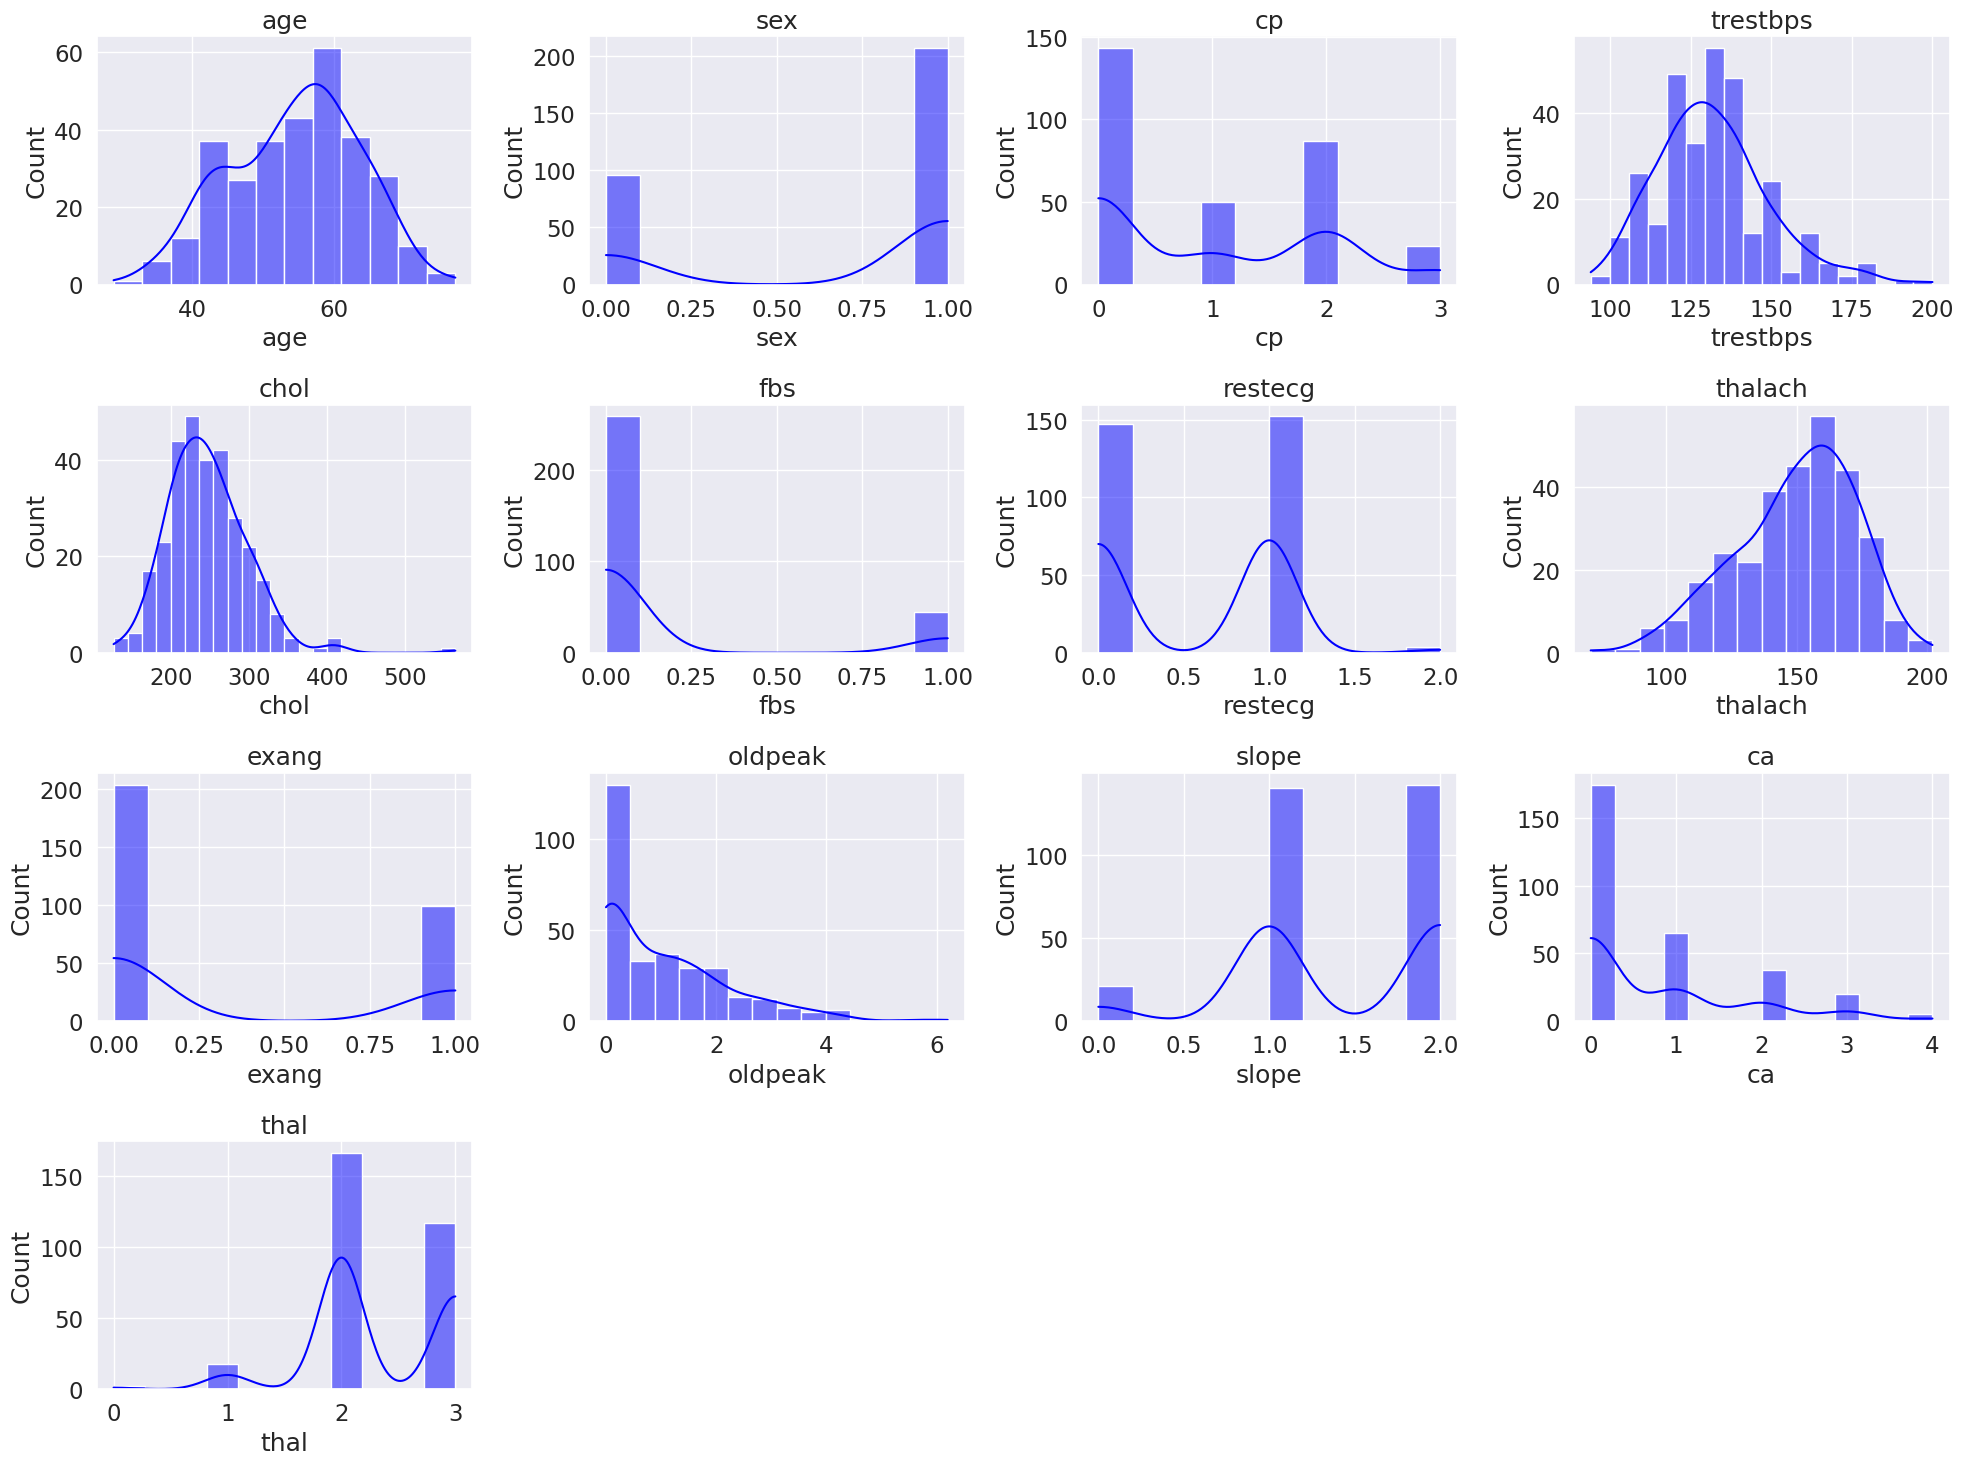

In [223]:
# Plot distributions of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True, color='blue')
    plt.title(column)
plt.tight_layout()
plt.show()


# **INFERENCE FROM THE DISTRIBUTION OF THE FEATURES**

- Age: The age distribution is **normally distributed with a slight right skew**, indicating a majority of middle-aged to elderly patients in the dataset. This is expected as heart disease risk increases with age.

- Sex: The histogram for sex **shows that the dataset contains more entries for one sex**, males as it is encoded as 1, suggesting that there are more data points for this gender.

- Chest Pain Type (cp): Chest pain type shows distribution suggesting that **one type of chest pain is more common than others**. This is angina, which is commonly associated with heart disease.

- Resting Blood Pressure (trestbps): The distribution of resting blood pressure appears to be **normally distributed with a slight right skew**, which means some patients have high blood pressure—a risk factor for heart disease.

- Serum Cholesterol (chol): Cholesterol levels also follow an approximately **normal distribution with a right skew**, suggesting that while most patients have cholesterol levels within a normal range, some have high cholesterol levels, another risk factor for heart disease.

- Fasting Blood Sugar (fbs): The fasting blood sugar histogram indicates that most patients in the dataset have **normal fasting blood sugar levels**, and a smaller number have levels indicative of diabetes, which is a risk factor for heart disease.

- Resting Electrocardiographic Results (restecg): The resting ECG results show a **concentration of patients in one category**, indicating normal ECG results, and fewer in abnormal categories.

- Maximum Heart Rate Achieved (thalach): The histogram for maximum heart rate is slightly **left-skewed**, indicating that more patients reach higher maximum heart rates, which might be associated with better cardiovascular fitness.

- Exercise-Induced Angina (exang): The exercise-induced angina graph shows that fewer patients experience angina due to exercise, which is a symptom that can be associated with heart disease.

- ST Depression (oldpeak): ST depression, measured by the oldpeak, shows a **right-skewed distribution** with most patients experiencing no or minimal depression, and fewer patients having higher values, which can be indicative of heart disease.

- Slope of the Peak Exercise ST Segment (slope): The slope of the peak exercise ST segment appears to have a **bimodal distribution**, suggesting two predominant types of slope responses in the dataset.

- Number of Major Vessels Colored by Fluoroscopy (ca): The distribution of visible vessels is s**kewed towards fewer visible vessels**, with most patients showing 0 vessels, and progressively fewer patients as the number increases.

- Thalassemia (thal): Thalassemia, a blood disorder, appears to be **bimodal or possibly trimodal**, suggesting distinct subgroups within the patient population, which could correlate with different types of the condition.

# **PREPARING THE DATASET TO BE MODELED**

In [224]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [225]:
# Split data into X and y
X = data.drop("target",axis=1)

y = data["target"]

In [226]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler().fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# **I. USING KNN ALGORITHM FOR PREDICTING THE TARGET VARIABLE**

The K-Nearest Neighbors (KNN) algorithm is a non-parametric supervised learning method used for classification and regression tasks.

**How it works for this dataset is as below:**

- **Training**: During the training phase, KNN stores all available labeled data points in a feature space. Each data point is associated with a class label.
- **Prediction**: When predicting the class label of a new, unseen data point, KNN finds the K nearest neighbors of that point in the feature space. The "nearest" neighbors are determined based on a distance metric, commonly the Euclidean distance.
- **Voting**: Once the K nearest neighbors are identified, the algorithm takes a majority vote among them to determine the class label of the new data point. The class label with the highest frequency among the K neighbors is assigned to the new data point.

In [227]:
knn = KNeighborsClassifier()

# Fit and score the model
def fit_and_score(knn, X_train, X_test, y_train, y_test):
    # Fit the model to data
    knn.fit(X_train, y_train)
    # Evaluate the model
    score = knn.score(X_test, y_test)
    return score


In [228]:
model_score = fit_and_score(knn,
                             X_train,
                             X_test,
                             y_train,
                             y_test)
print("Model Score:", model_score)

Model Score: 0.9016393442622951


**The model achieves an accuracy score of approximately 90.16% on the test data. This means that the model correctly predicts the target variable (whether a patient has heart disease or not) for about 90.16% of the samples in the test dataset.**

In [229]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    # Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))

In [230]:
knn.set_params(n_neighbors = np.argmax(test_scores)+1 )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

# **VISUALIZING THE TEST AND TRAIN SCORES FROM THE KNN MODEL**

Maximum KNN score on the test data: 91.80%


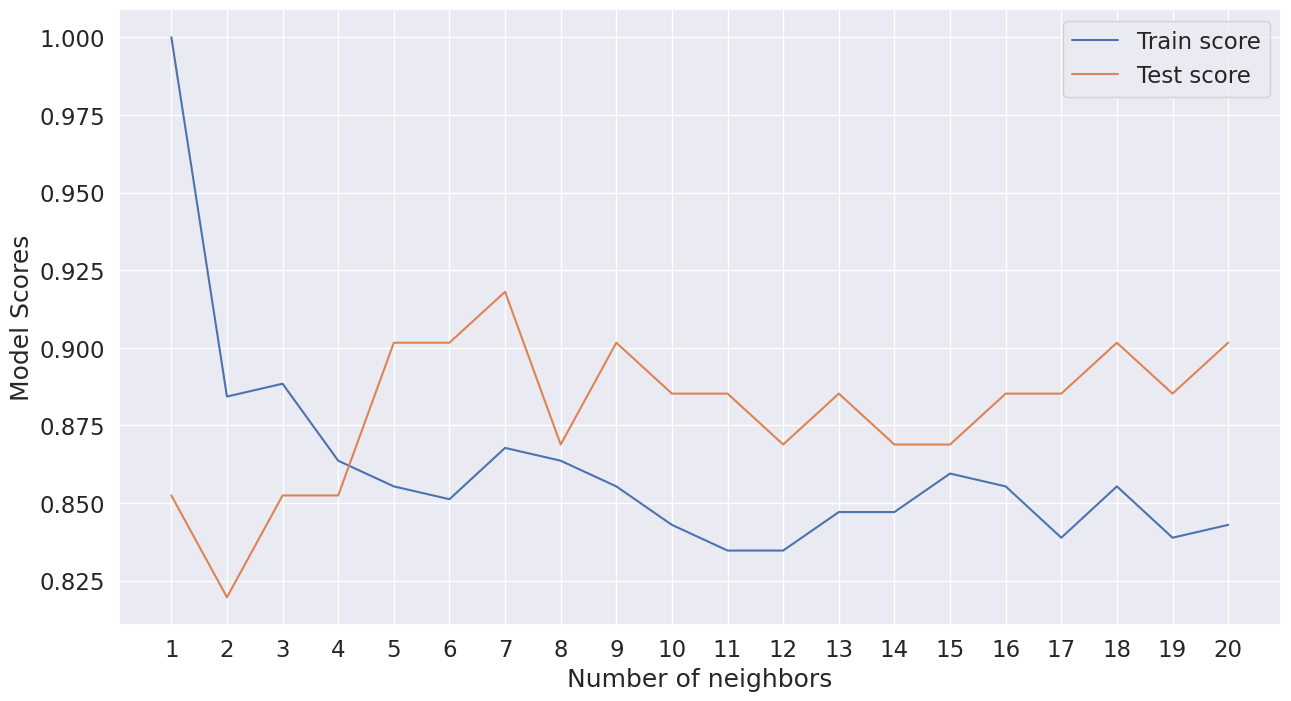

In [231]:
plt.figure(figsize=(15, 8))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

# **INFERENCE FROM THE GRAPH**

**Overfitting vs. Underfitting:**
- At a low number of neighbors (from 1 to 5), the model performs better on the training data than on the test data, which is indicative of overfitting. The model is too complex and memorizes the training data, leading to poor generalization on unseen data.

- As the number of neighbors increases, the difference between training and test scores generally decreases, **suggesting that the model is generalizing better.**

In [232]:
y_preds = knn.predict(X_test)

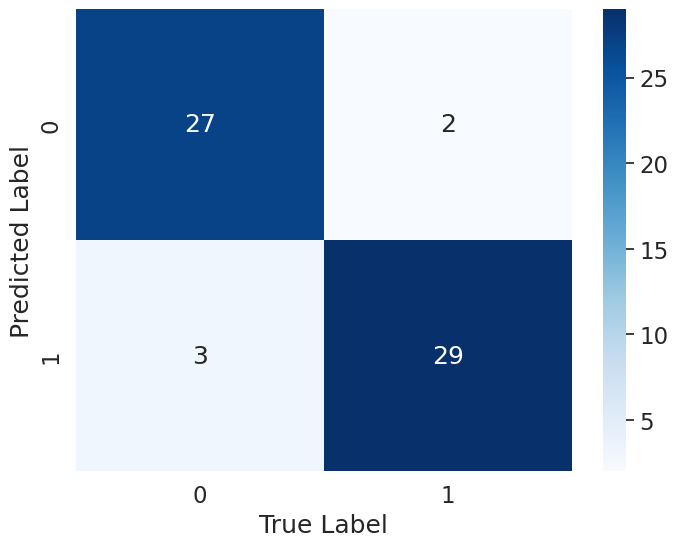

In [233]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cmap='Blues')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test,y_preds)

In [234]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# **INFERENCE FROM THE CONFUSION MATRIX AND CLASSIFICATION REPORT**

**Confusion Matrix:**

- The confusion matrix has 27 True Negatives (top left) and 29 True Positives (bottom right), indicating the number of correct predictions for the negative class (0) and positive class (1), respectively.
- There are 2 False Positives (top right) and 3 False Negatives (bottom left). False Positives are instances where the model incorrectly predicted the positive class, and False Negatives are where the model incorrectly predicted the negative class.

**Classification Report:**
- Precision for class 0 is 0.90, meaning that when the model predicts class 0, it is correct 90% of the time.
- Recall (sensitivity) for class 0 is 0.93, indicating that the model correctly identifies 93% of all actual class 0 instances.
- F1-score for class 0 is 0.92, which is a harmonic mean of precision and recall, showing a balance between the two for class 0.
- For class 1 (the positive class), precision is 0.94, recall is 0.91, and - F1-score is 0.92, all of which are relatively high and **suggest good model performance for the positive class.**

- The support column shows the number of actual occurrences of each class in the dataset, which are 29 for class 0 and 32 for class 1.
- **Overall accuracy of the model on the test set is 0.92, indicating that 92% of the time, the model's predictions are correct.**

**Model Performance:**

- The model shows a balanced performance on both classes with similar metrics for precision, recall, and F1-score.
- The high accuracy and balanced F1-scores suggest that the model has a good predictive performance on this particular dataset.
- There is a slight imbalance in the false positives and false negatives (2 vs. 3), but given the small difference, it doesn't indicate a strong bias towards one class.

In [235]:
knn.score(X_test,y_test)

0.9180327868852459

# **II. USING RANDOM FOREST CLASSIFIER WITH CROSS VALIDATION FOR PREDICTING THE TARGET VARIABLE**

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training time and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Train the Random Forest classifier on the entire training dataset
rf_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred_rf = rf_classifier.predict(X_test)


Cross-validation scores: [0.81632653 0.79591837 0.8125     0.79166667 0.79166667]
Mean CV score: 0.8016156462585033


# **INFERENCE FROM THE CROSS VALIDATION SCORES OF RANDOM CLASSIFER**

- The cross-validation scores obtained for the Random Forest Classifier with 5 folds are as follows:

  Fold 1: 0.8163

  Fold 2: 0.7959
  
  Fold 3: 0.8125
  
  Fold 4: 0.7917
  
  Fold 5: 0.7917

  **The mean cross-validation score is approximately 0.8016**.

**The Random Forest Classifier achieves an average cross-validation accuracy score of around 80.16%**. This indicates that the model performs reasonably well in predicting the presence or absence of heart disease across different subsets of the training data.

# **VISUALIZATION OF THE CROSS VALIDATION SCORES AND CONFUSION MATRIX**

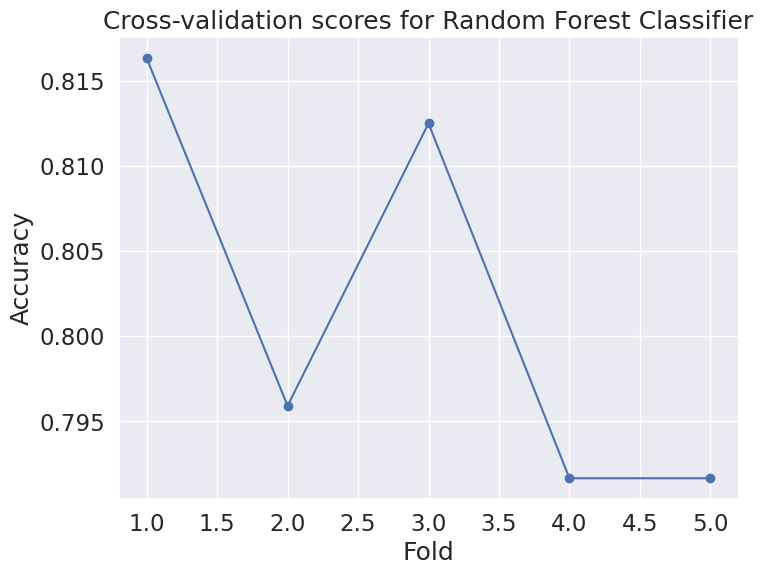

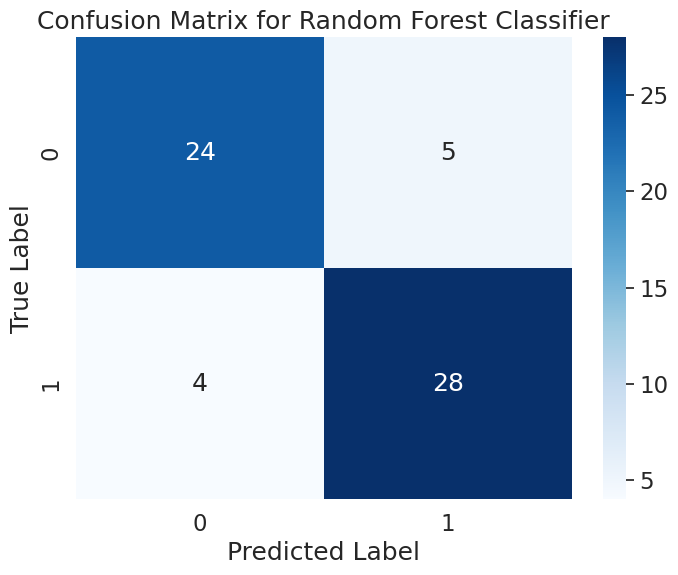

In [237]:
from sklearn.metrics import confusion_matrix

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-validation scores for Random Forest Classifier')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# **INFERENCE FROM THE VISUALIZATION OF THE CROSS VALIDATION SCORES AND CONFUSION MATRIX**

**Cross-Validation Scores Graph:**

- The line graph shows some variability in accuracy scores across five folds of cross-validation, with scores ranging from approximately 79.5% to 81.5%.
- The variation suggests that the model's performance may depend on the particular subset of data used in each fold. **The highest accuracy is observed in the third fold.**

**Confusion Matrix:**

- The confusion matrix shows the numbers of true positive, true negative, false positive, and false negative predictions.
- There are 24 true negatives (class 0 correctly identified as 0) and 28 true positives (class 1 correctly identified as 1), indicating a strong performance. - However, there are 5 false positives (class 0 incorrectly identified as 1) and 4 false negatives (class 1 incorrectly identified as 0), suggesting some misclassifications.
- The classifier shows good precision and recall for both classes but seems to perform slightly better for class 1.


KNN Model Score (5 Neighbors): 0.9016393442622951
Mean CV Score (Random Forest): 0.7892006802721088


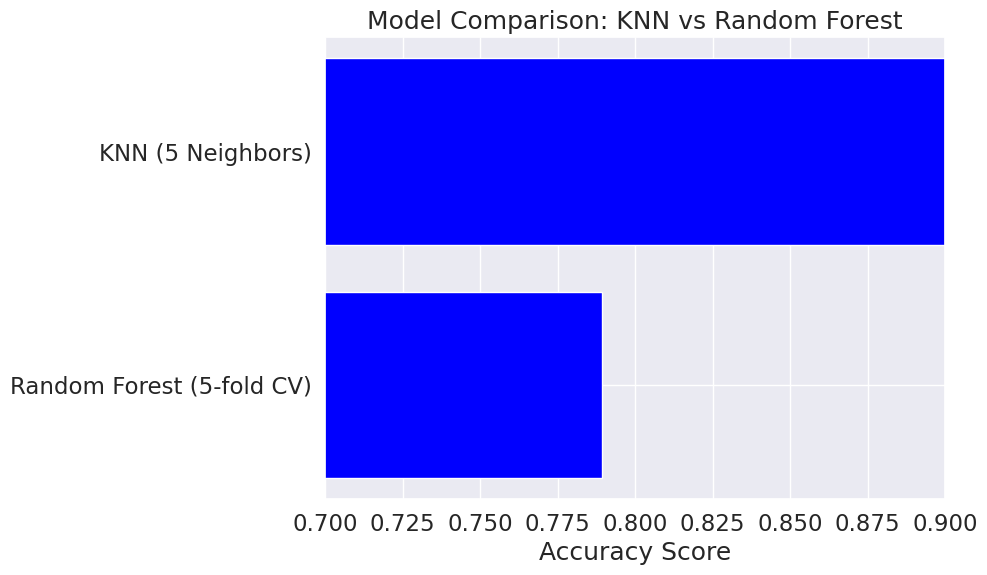

In [238]:
# Initialize KNN classifier with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit and score the KNN model
knn_classifier.fit(X_train, y_train)
knn_score = knn_classifier.score(X_test, y_test)

# Perform cross-validation with Random Forest classifier
rf_classifier = RandomForestClassifier()
cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=5)
mean_cv_score_rf = cv_scores_rf.mean()

# Print the scores
print("KNN Model Score (5 Neighbors):", knn_score)
print("Mean CV Score (Random Forest):", mean_cv_score_rf)

models = ['KNN (5 Neighbors)', 'Random Forest (5-fold CV)']
scores = [knn_score, mean_cv_score_rf]

# Plot
plt.figure(figsize=(8, 6))
plt.barh(models, scores, color=['blue', 'blue'])
plt.xlabel('Accuracy Score')
plt.title('Model Comparison: KNN vs Random Forest')
plt.xlim(0.7, 0.9)  # Adjust the x-axis limits for better visualization
plt.gca().invert_yaxis()  # Invert y-axis to have KNN on top
plt.show()


# **INFERENCE FROM THE COMPARISIONS OF THE TWO MODELS**

- **The KNN classifier with 5 neighbors outperforms the Random Forest model** in terms of accuracy on this particular dataset.
- The difference in performance might be due to various factors such as the nature of the data, the complexity of the model, the hyperparameters used, or the way each algorithm handles the feature space.
- KNN's higher score **suggests that for this specific set of data, a simpler model with a smaller number of neighbors is sufficient to achieve high predictive accuracy**.
- The Random Forest model, while generally robust, may require tuning of its hyperparameters to improve its performance.

In [239]:
import joblib

joblib.dump(knn, 'knn_model_trained.h5')

['knn_model_trained.h5']

# **CONCLUSION**

- The KNN model demonstrated an impressive accuracy of approximately 90.16% on the test dataset. This suggests that the model has effectively learned from the dataset and can generalize well to new, unseen data.
- The Random Forest classifier was subjected to a 5-fold cross-validation process to assess its robustness across different subsets of the data. It achieved a mean cross-validation score of approximately 80.16%, which, while reasonably good, did not outperform the KNN model.

- When comparing the two models, **KNN showed a higher score, which lead to its selection as the preferred model and further for the creation of the streamlit application**.

In conclusion, the analysis suggests that while both models have their merits, **KNN edges out with better performance in this scenario**. However, given the variance observed in the cross-validation scores of the Random Forest model, there is room for hyperparameter tuning, which could potentially improve its accuracy.

# **REFERENCES**

Dataset : https://www.kaggle.com/datasets/arezaei81/heartcsv

1. https://www.kaggle.com/code/farzadnekouei/heart-disease-prediction

2. https://www.kaggle.com/code/nmsriharsha576/classificationmetrics

3. https://www.youtube.com/watch?v=TJveOYsK6MY

4. https://www.youtube.com/watch?v=ojYeSMVdTSI

5. https://www.youtube.com/watch?v=CQveSaMyEwM

6. https://chat.openai.com/


# **LICENSE**

MIT License

Copyright (c) 2024 vaishveerkumar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.